In [152]:
import pandas as pd
import seaborn as sns

In [153]:
data=pd.read_csv(r"C:\ml\da\titanic_data.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [154]:
data=data.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [155]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [156]:
data=data.dropna(axis=0)

<Axes: >

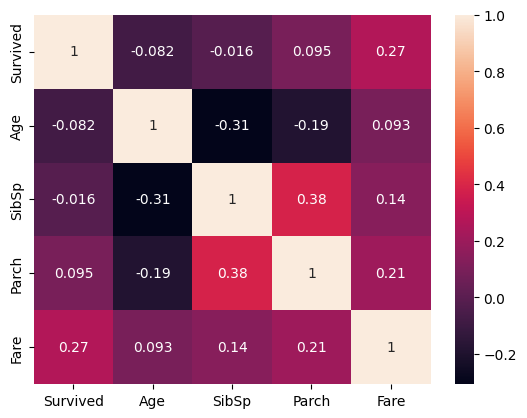

In [157]:
sns.heatmap(data[["Survived","Age","SibSp","Parch","Fare"]].corr(),annot=True)

In [158]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          88
SibSp         6
Parch         7
Fare        219
Embarked      3
dtype: int64

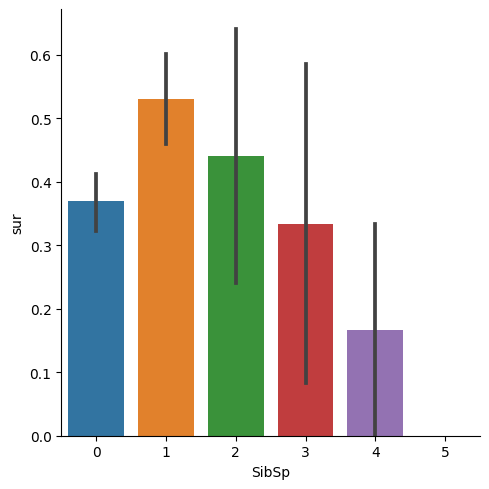

In [159]:
sns.catplot(x='SibSp',y="Survived",data=data,kind="bar").set_ylabels("sur")

C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\preeti\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use

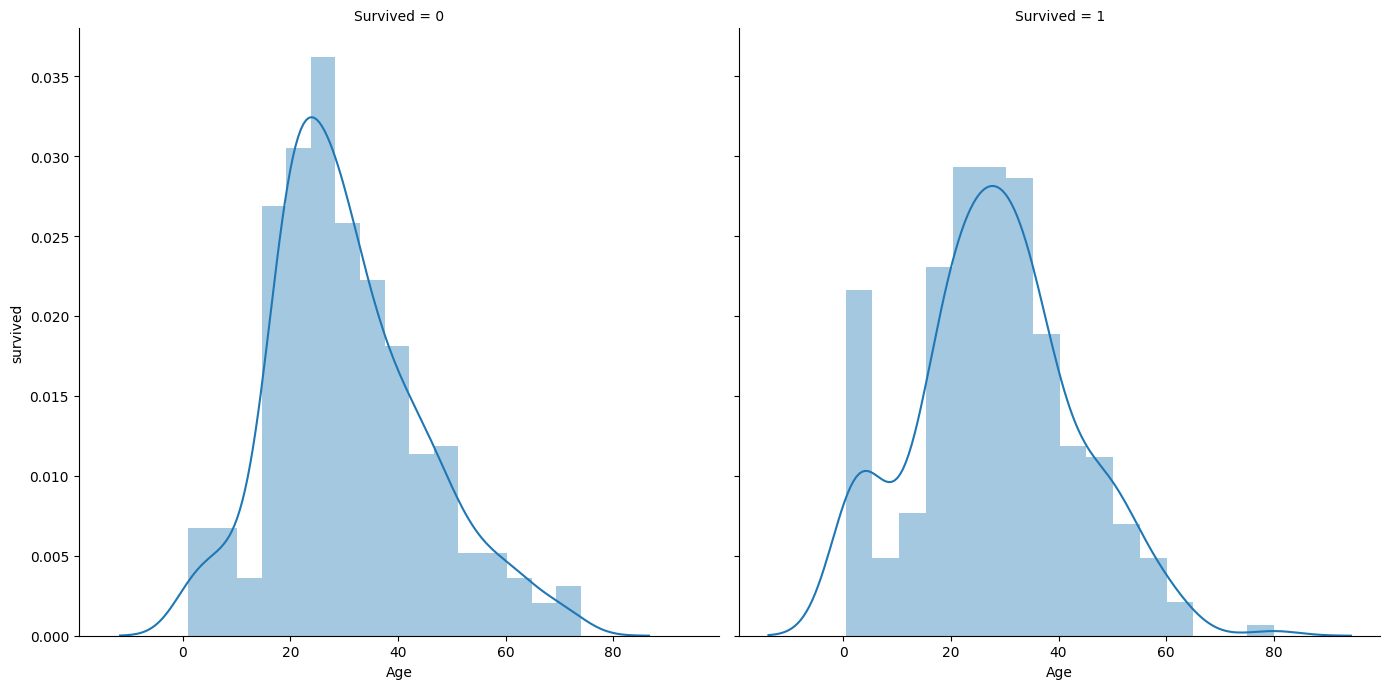

In [160]:
age=sns.FacetGrid(data,col="Survived",height = 7)
age=age.map(sns.distplot,"Age").set_ylabels("survived")

Text(0, 0.5, 'sur')

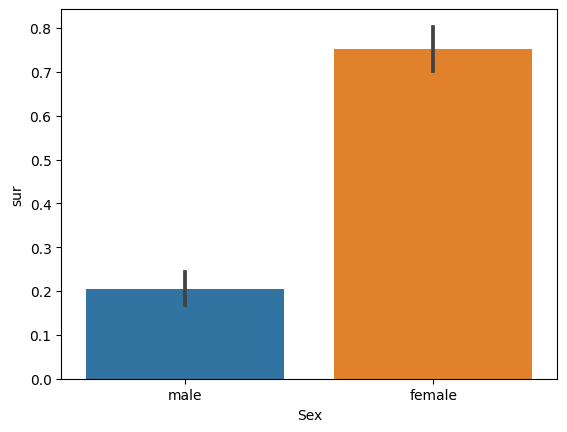

In [161]:
sns.barplot(x="Sex",y="Survived",data=data).set_ylabel("sur")

Text(0, 0.5, 'sur')

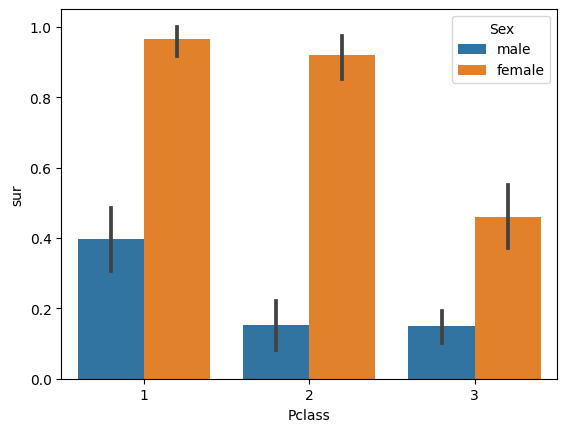

In [162]:
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=data).set_ylabel("sur")

In [163]:
mapi={"male":1,"female":0}
data["Sex"]=data['Sex'].map(mapi)

In [164]:
mapi={"S":0,"C":1,"Q":2}
data["Embarked"]=data['Embarked'].map(mapi)

In [165]:
x=data.drop(['Survived'],axis=1)
y=data['Survived']

In [166]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [167]:
from sklearn.preprocessing import StandardScaler
sr=StandardScaler()
x_train=sr.fit_transform(x_train)

x_test=sr.fit_transform(x_test)


In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [182]:
r=RandomForestClassifier(n_estimators=100)
r.fit(x_train,y_train)
accuracy_score(y_test,r.predict(x_test))

0.7902097902097902

In [186]:
l=LogisticRegression()
l.fit(x_train,y_train)
accuracy_score(y_test,l.predict(x_test))

0.7902097902097902

In [187]:
s=SVC()
s.fit(x_train,y_train)
accuracy_score(y_test,s.predict(x_test))

0.7972027972027972

In [188]:
t=DecisionTreeClassifier()
t.fit(x_train,y_train)
accuracy_score(y_test,t.predict(x_test))

0.7832167832167832